# Normalisasi Data Training Menggunakan Metode Min-Max Scaling

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Import file CSV
train_data = pd.read_csv('data_training.csv')

# Tampilkan data sebelum normalisasi
print("=== Data Training Sebelum Normalisasi ===")
print(train_data.head())

# Pisahkan fitur (X) dan target (y)
X_train = train_data.drop(columns=['Outcome'])  # Semua fitur
y_train = train_data['Outcome']  # Target

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi fitur
X_train_scaled = scaler.fit_transform(X_train)

# Menggabungkan kembali fitur yang dinormalisasi dengan target
train_data_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
train_data_scaled['Outcome'] = y_train.values

# Tampilkan data setelah normalisasi
print("\n=== Data Training Setelah Normalisasi ===")
print(train_data_scaled.head())

# Data yang dinormalisasi sekarang tersimpan di train_data_scaled DataFrame

=== Data Training Sebelum Normalisasi ===
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2       84              0              0        0   0.0   
1            9      112             82             24        0  28.2   
2            1      139             46             19       83  28.7   
3            0      161             50              0        0  21.9   
4            6      134             80             37      370  46.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.304   21        0  
1                     1.282   50        1  
2                     0.654   22        0  
3                     0.254   65        0  
4                     0.238   46        1  

=== Data Training Setelah Normalisasi ===
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.117647  0.422111       0.000000       0.000000  0.000000  0.000000   
1     0.529412  0.562814       0.672131       0.380952  0.0000

# Mencari Nilai K Terbaik Menggunakan Kombinasi Grid Search dengan Cross-Validation

In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Asumsikan data sudah dinormalisasi dan disimpan dalam variabel 'train_data_scaled'
# Jika Anda sudah menjalankan kode sebelumnya, Anda dapat langsung menggunakan train_data_scaled

# Pisahkan fitur (X) dan target (y)
X = train_data_scaled.drop(columns=['Outcome'])  # Semua fitur
y = train_data_scaled['Outcome']  # Target

# Cari Nilai k Terbaik
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 21)}  # Mencoba nilai k dari 1 hingga 20
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation
grid_search.fit(X, y)

# Tampilkan hasil
print("Nilai k terbaik:", grid_search.best_params_['n_neighbors'])
print("Akurasi terbaik:", grid_search.best_score_)

Nilai k terbaik: 17
Akurasi terbaik: 0.7475809676129548


# Visualisasi Distribusi Kelas Target (Outcome) di Data Training

Jumlah data untuk setiap kelas target (Outcome):
Outcome
0    401
1    213
Name: count, dtype: int64


C:\Users\Dimas Pratama\AppData\Local\Temp\ipykernel_22520\2714594389.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=train_data, palette='viridis')


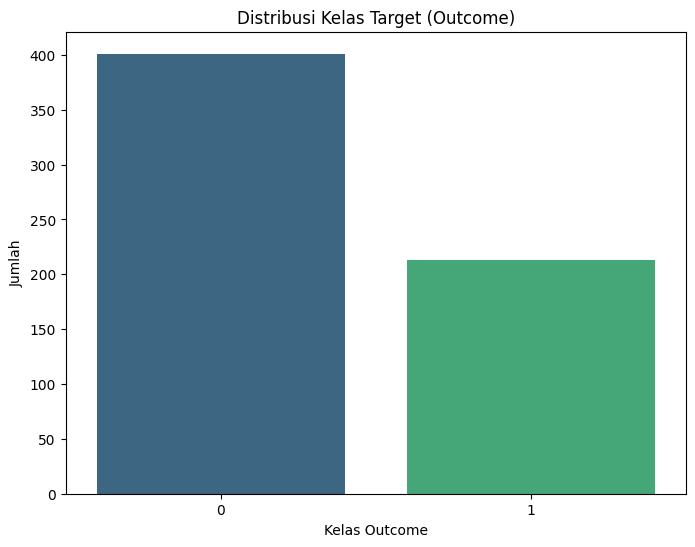

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan train_data sudah ada dari langkah sebelumnya

# Menampilkan jumlah data untuk setiap kelas target (Outcome)
class_counts = train_data['Outcome'].value_counts()
print("Jumlah data untuk setiap kelas target (Outcome):")
print(class_counts)

# Visualisasi distribusi kelas target (Outcome)
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=train_data, palette='viridis')
plt.title('Distribusi Kelas Target (Outcome)')
plt.xlabel('Kelas Outcome')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()


# Handling Imbalance Data Menggunakan SMOTE

Jumlah data untuk setiap kelas target (Outcome) setelah SMOTE:
Outcome
0    401
1    401
Name: count, dtype: int64


C:\Users\Dimas Pratama\AppData\Local\Temp\ipykernel_22520\2936706040.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=train_data_resampled, palette='viridis')


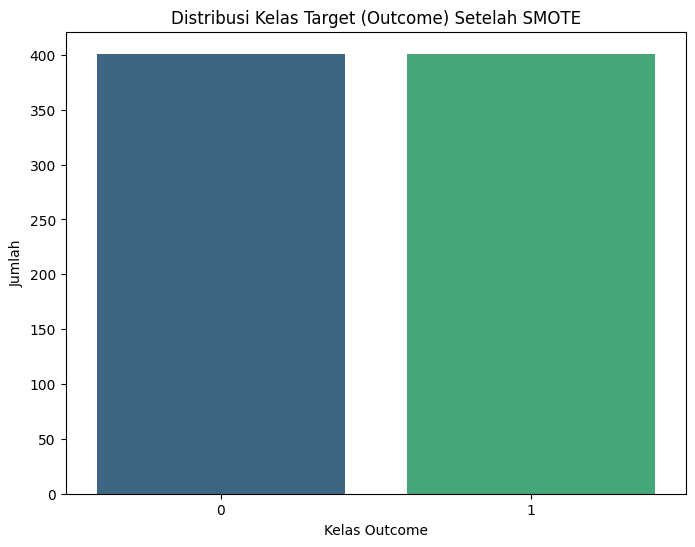

In [4]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan train_data sudah ada dari langkah sebelumnya

# Pisahkan fitur (X) dan target (y)
X_train = train_data.drop(columns=['Outcome'])  # Semua fitur
y_train = train_data['Outcome']  # Target

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menggabungkan kembali fitur yang sudah di-resample dengan target
train_data_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
train_data_resampled['Outcome'] = y_train_resampled

# Menampilkan jumlah data untuk setiap kelas target setelah SMOTE
class_counts_resampled = train_data_resampled['Outcome'].value_counts()
print("Jumlah data untuk setiap kelas target (Outcome) setelah SMOTE:")
print(class_counts_resampled)

# Visualisasi distribusi kelas target setelah SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=train_data_resampled, palette='viridis')
plt.title('Distribusi Kelas Target (Outcome) Setelah SMOTE')
plt.xlabel('Kelas Outcome')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()


# Visualisasi Distribusi Kelas Target Sebelum dan Setelah SMOTE

Jumlah data untuk setiap kelas target (Outcome) sebelum SMOTE:
Outcome
0    401
1    213
Name: count, dtype: int64

Jumlah data untuk setiap kelas target (Outcome) setelah SMOTE:
Outcome
0    401
1    401
Name: count, dtype: int64


C:\Users\Dimas Pratama\AppData\Local\Temp\ipykernel_22520\1774285629.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=train_data, palette='viridis')
C:\Users\Dimas Pratama\AppData\Local\Temp\ipykernel_22520\1774285629.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=train_data_resampled, palette='viridis')


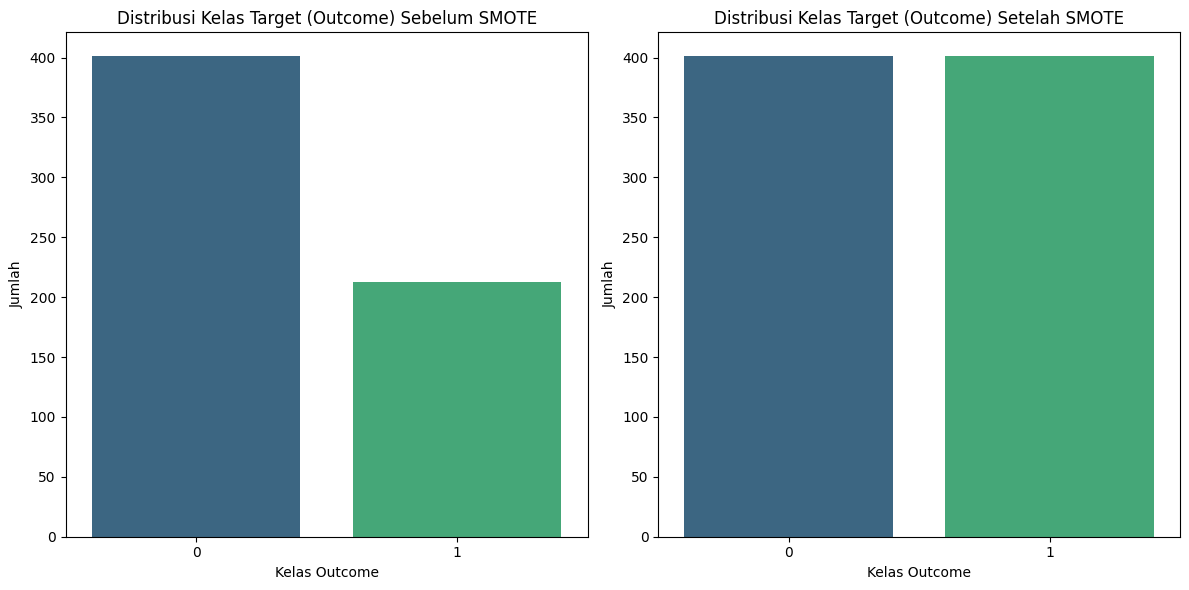

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Asumsikan train_data sudah ada dari langkah sebelumnya

# Menampilkan jumlah data untuk setiap kelas target sebelum SMOTE
class_counts_before = train_data['Outcome'].value_counts()
print("Jumlah data untuk setiap kelas target (Outcome) sebelum SMOTE:")
print(class_counts_before)

# Pisahkan fitur (X) dan target (y)
X_train = train_data.drop(columns=['Outcome'])  # Semua fitur
y_train = train_data['Outcome']  # Target

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menggabungkan kembali fitur yang sudah di-resample dengan target
train_data_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
train_data_resampled['Outcome'] = y_train_resampled

# Menampilkan jumlah data untuk setiap kelas target setelah SMOTE
class_counts_after = train_data_resampled['Outcome'].value_counts()
print("\nJumlah data untuk setiap kelas target (Outcome) setelah SMOTE:")
print(class_counts_after)

# Visualisasi distribusi kelas target sebelum dan setelah SMOTE
plt.figure(figsize=(12, 6))

# Subplot untuk sebelum SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x='Outcome', data=train_data, palette='viridis')
plt.title('Distribusi Kelas Target (Outcome) Sebelum SMOTE')
plt.xlabel('Kelas Outcome')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

# Subplot untuk setelah SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x='Outcome', data=train_data_resampled, palette='viridis')
plt.title('Distribusi Kelas Target (Outcome) Setelah SMOTE')
plt.xlabel('Kelas Outcome')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


# Menampilkan Data Hasil Handling Imbalance Menggunakan SMOTE

In [6]:
# Menampilkan beberapa baris pertama dari data hasil handling imbalance menggunakan SMOTE
print("=== Data Hasil Handling Imbalance Menggunakan SMOTE ===")
print(train_data_resampled.head())

# Menampilkan informasi tentang dataset hasil SMOTE
print("\nInformasi tentang dataset hasil SMOTE:")
print(train_data_resampled.info())


=== Data Hasil Handling Imbalance Menggunakan SMOTE ===
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2       84              0              0        0   0.0   
1            9      112             82             24        0  28.2   
2            1      139             46             19       83  28.7   
3            0      161             50              0        0  21.9   
4            6      134             80             37      370  46.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.304   21        0  
1                     1.282   50        1  
2                     0.654   22        0  
3                     0.254   65        0  
4                     0.238   46        1  

Informasi tentang dataset hasil SMOTE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -

# Visualisasi Correlation Matrix

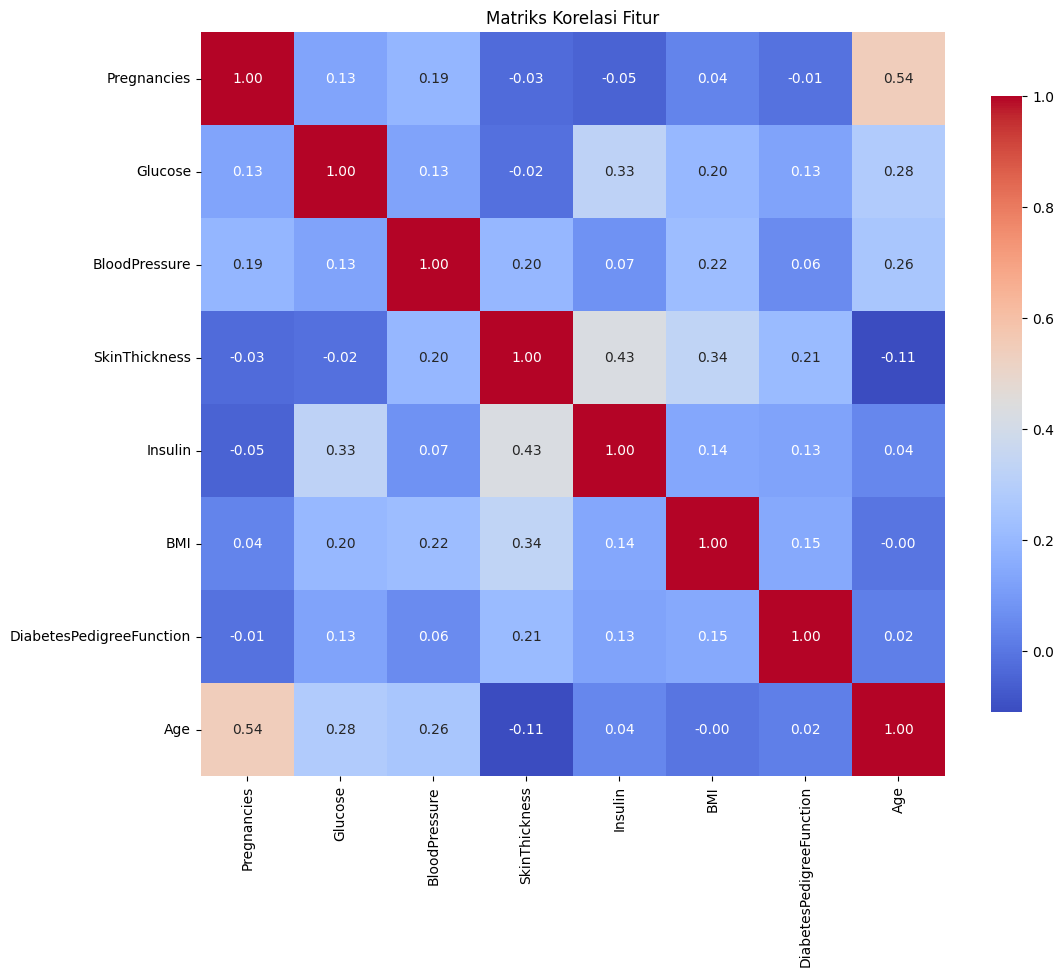

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan train_data_resampled sudah ada dari langkah sebelumnya

# Hitung matriks korelasi untuk semua fitur kecuali Outcome
correlation_matrix = train_data_resampled.drop(columns=['Outcome']).corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriks Korelasi Fitur')
plt.show()


# Normalisasi Data Testing Menggunakan Metode Min-Max Scaling

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Memuat dataset testing
test_data = pd.read_csv('data_testing.csv')

# Tampilkan data sebelum normalisasi
print("=== Data Testing Sebelum Normalisasi ===")
print(test_data.head())

# Pisahkan fitur (X) dan target (y) jika ada
# Misalkan kita tidak memiliki kolom target di data testing
X_test = test_data  # Semua fitur

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi fitur
X_test_scaled = scaler.fit_transform(X_test)

# Menggabungkan kembali fitur yang dinormalisasi
test_data_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Tampilkan data setelah normalisasi
print("\n=== Data Testing Setelah Normalisasi ===")
print(test_data_scaled.head())

# Data yang dinormalisasi sekarang tersimpan di test_data_scaled DataFrame


=== Data Testing Sebelum Normalisasi ===
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6       98             58             33      190  34.0   
1            2      112             75             32        0  35.7   
2            2      108             64              0        0  30.8   
3            8      107             80              0        0  24.6   
4            7      136             90              0        0  29.9   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.430   43        0  
1                     0.148   21        0  
2                     0.158   21        0  
3                     0.856   34        0  
4                     0.210   50        0  

=== Data Testing Setelah Normalisasi ===
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.461538  0.266667       0.508772       0.333333  0.328152  0.639098   
1     0.153846  0.370370       0.657895       0.323232  0.000000

# Melatih Model KNN

Results without Pregnancies:
Confusion Matrix:
[[92  7]
 [26 29]]

Classification Report:
              precision    recall  f1-score     support
0              0.779661  0.929293  0.847926   99.000000
1              0.805556  0.527273  0.637363   55.000000
accuracy       0.785714  0.785714  0.785714    0.785714
macro avg      0.792608  0.728283  0.742644  154.000000
weighted avg   0.788909  0.785714  0.772725  154.000000


Results without Glucose:
Confusion Matrix:
[[74 25]
 [23 32]]

Classification Report:
              precision    recall  f1-score     support
0              0.762887  0.747475  0.755102   99.000000
1              0.561404  0.581818  0.571429   55.000000
accuracy       0.688312  0.688312  0.688312    0.688312
macro avg      0.662145  0.664646  0.663265  154.000000
weighted avg   0.690928  0.688312  0.689504  154.000000


Results without BloodPressure:
Confusion Matrix:
[[90  9]
 [26 29]]

Classification Report:
              precision    recall  f1-score     support


<Figure size 1200x800 with 0 Axes>

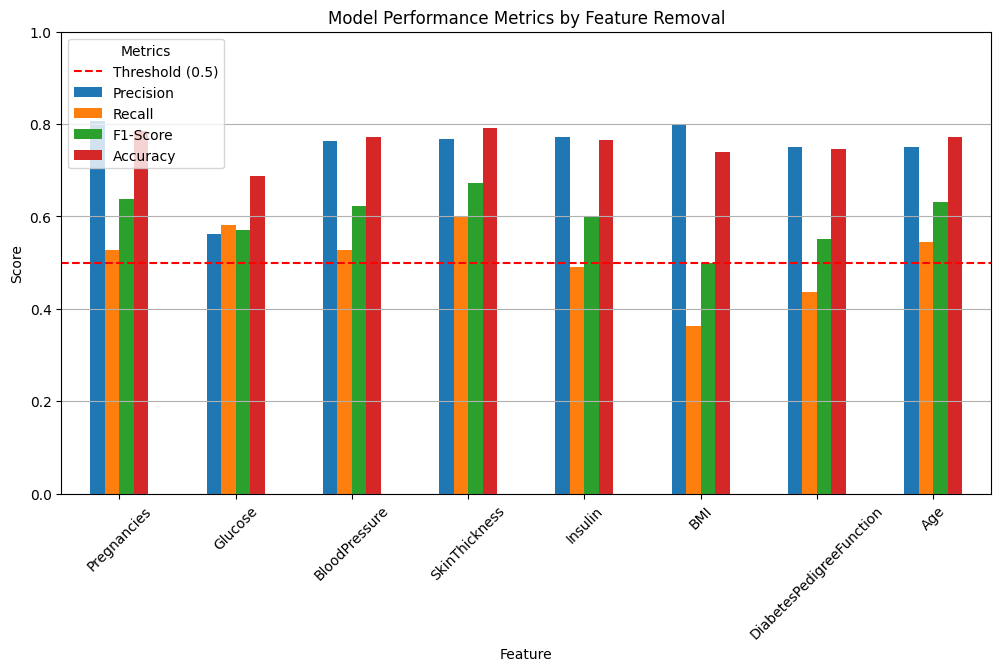

C:\Users\Dimas Pratama\AppData\Local\Temp\ipykernel_22520\2590529708.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Support', data=metrics_df, palette='viridis')


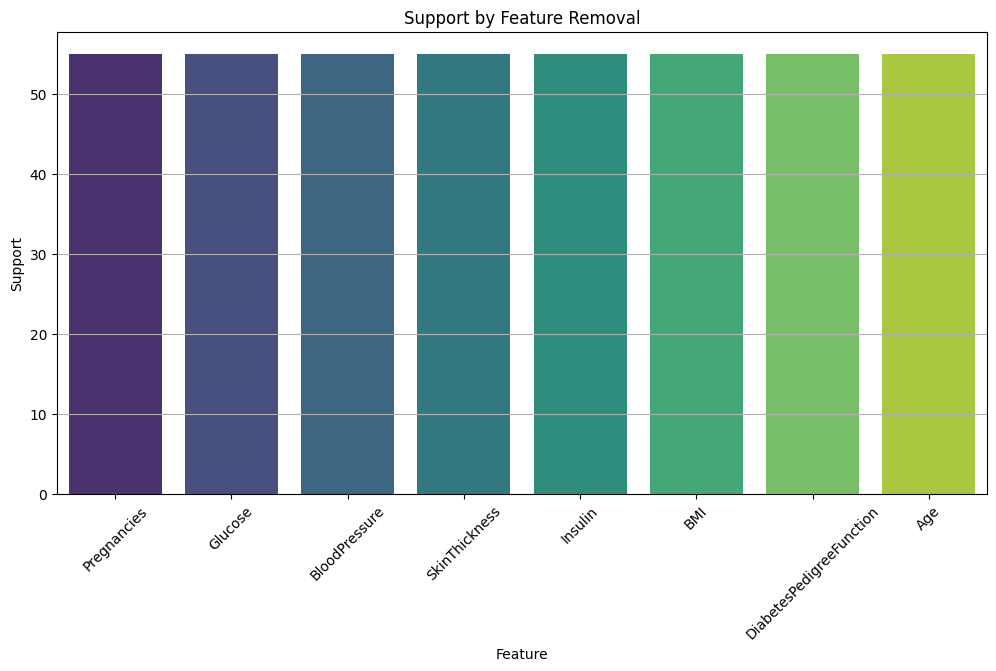

In [9]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan train_data_scaled dan test_data_scaled sudah ada dari langkah sebelumnya

# Pisahkan fitur (X) dan target (y) dari data pelatihan
X_train = train_data_scaled.drop(columns=['Outcome'])  # Semua fitur
y_train = train_data_scaled['Outcome'].astype(int)  # Target

# Daftar fitur yang akan diuji
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Simpan hasil evaluasi
results = {}

# Iterasi melalui setiap fitur
for feature in features:
    # Hilangkan satu fitur
    X_train_selected = X_train.drop(columns=[feature])
    
    # Pisahkan fitur (X_test) dan target (y_test) dari data pengujian
    if 'Outcome' in test_data_scaled.columns:
        X_test = test_data_scaled.drop(columns=['Outcome']).drop(columns=[feature])  # Semua fitur kecuali yang dihilangkan
        y_test = test_data_scaled['Outcome'].astype(int)  # Target
    else:
        X_test = test_data_scaled.drop(columns=[feature])  # Semua fitur kecuali yang dihilangkan

    # Inisialisasi model KNN
    knn = KNeighborsClassifier(n_neighbors=17)  # n_neighbors yang terbaik 17 berdasarkan hasil hitung

    # Latih model
    knn.fit(X_train_selected, y_train)

    # Lakukan prediksi pada data pengujian
    y_pred = knn.predict(X_test)

    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Simpan hasil evaluasi
    results[feature] = {
        'confusion_matrix': cm,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

# Ekstrak metrik untuk visualisasi
metrics_list = []
for feature, metrics in results.items():
    report = metrics['classification_report']
    metrics_list.append({
        'Feature': feature,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'Support': report['1']['support'],
        'Accuracy': metrics['confusion_matrix'].trace() / metrics['confusion_matrix'].sum()  # Hitung akurasi
    })

# Buat DataFrame dari metrik
metrics_df = pd.DataFrame(metrics_list)

# Tampilkan hasil evaluasi dalam bentuk tabel
for feature, metrics in results.items():
    print(f"Results without {feature}:")
    
    # Tampilkan Confusion Matrix
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    
    # Tampilkan Classification Report sebagai DataFrame
    report_df = pd.DataFrame(metrics['classification_report']).transpose()
    print("\nClassification Report:")
    print(report_df)
    
    print("\n" + "="*50 + "\n")

# Visualisasi
plt.figure(figsize=(12, 8))

# Plot untuk Precision, Recall, F1-Score, dan Accuracy
metrics_df.set_index('Feature')[['Precision', 'Recall', 'F1-Score', 'Accuracy']].plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Metrics by Feature Removal')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.axhline(0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot untuk Support
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Support', data=metrics_df, palette='viridis')
plt.title('Support by Feature Removal')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
